# Model Regresi Linear Sederhana

Regresi Linear adalah metode untuk mendefinisikan hubungan linear antara variabel dependen **Y** dan variabel
independen **X**. Secara sederhana dapat dituliskan dalam formula berikut:

<center>
    $ 𝑌_𝑖 = 𝑏_0 + 𝑏_1𝑋_𝑖 + \epsilon_i $

Yang mana $Y_i$ adalah variabel dependen, $X_i$ adalah variabel independen, adalah kesalahan acak, disebut sebagai intercept dan disebut sebagai koefisien regresi yang dapat diestimasi berdasarkan data dan yang diberikan. Koefisien juga biasa disebut sebagai bias. Tujuan utama dari model ini adalah untuk mengambarkan garis linear dengan kesesuaian terbaik(best fit) antara X dan Y yang mengestimasi hubungan antara X dan Y.

Lalu bagaimana untuk mengestimasi koefisien tersebut? Salah satu pendekatan yang dapat dilakukan adalah mengunakan metode **Ordinary Least Mean Square Method**. Pada python notebook ini, kita akan mengimplementasikan metode Ordinary Least Mean Square Method.

# Ordinary Least Mean Square

Sebelumnya kita telah membahas tentang estimasi hubungan antara X dan Y pada sebuah garis. Misalnya, kita sediakan input dan output sampel, kemudian kita memplot titik titik data ini pada grafik 2 dimensi, maka akan dihasilkan grafik seperti di bawah ini:
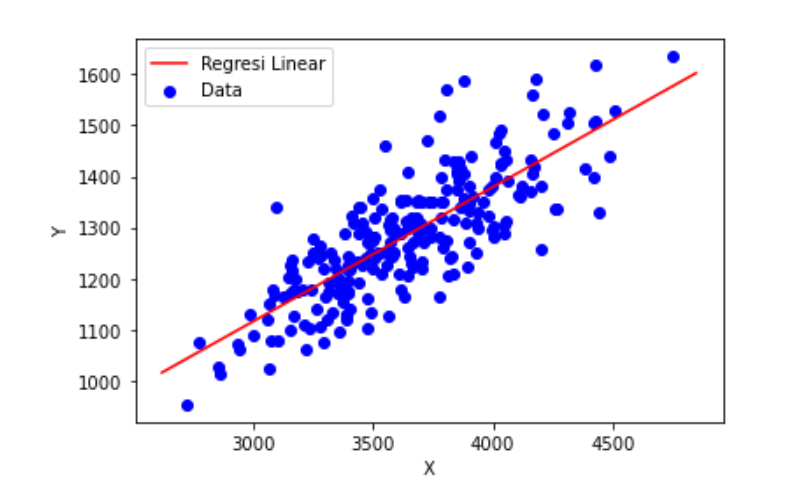

Garis merah pada grafik adalah hubungan sesungguhnya yang ingin disetimasi. Kita berusaha untuk meminimalkan kesalahan model yang kita bangun. Garis ini adalah garis yang paling tepat menggambarkan hubungan antara data X dan Y dengan melewati sebagian besar titik data dan memiliki kesalahan yang paling minimal. Kesalahan ini berupa jarak titik data ke garis estimasi model ini. Secara konseptual kesalahan ini diilustrasikan pada gambar di bawah ini.
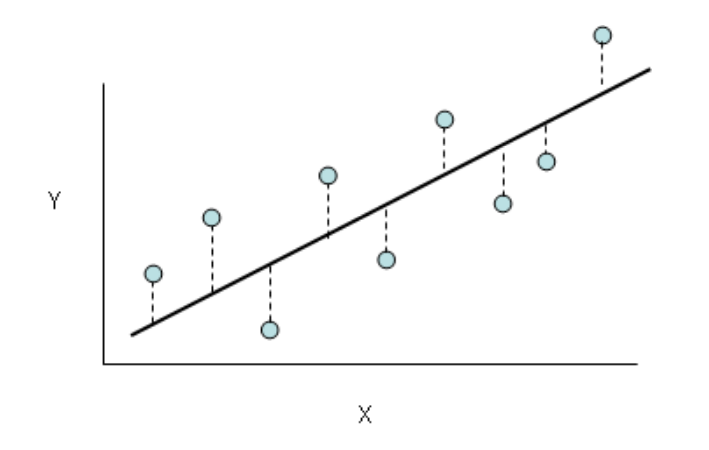

Dan kesalahan total model linier adalah jumlah kesalahan dari setiap titiknya, yaitu:

<center>
$ \sum \limits_{i-1} ^{n} {\epsilon_i}^2 $

$ \epsilon_i = $ Jarak antara garis ke titik data ke - i

$ {n} = $ Jumlah total titik data

Formula di atas diperoleh dari:

<center>
    $\begin{eqnarray} 
    y_{i} = b_{0} + b_{1}.x_{i} + \epsilon_{i}\\
    \epsilon_{i} = y_{i} - b_{0} - b_{1}.x_i + \epsilon_{i}\\
    \sum \limits_{i-1} ^{n} {\epsilon_i}^2 &=& \sum \limits_{i=1} ^{n} {(y_i - b_{0} - b_{1}. x_{i})}^2\\
    \end{eqnarray}$

Pada baris terakhir persamaan di atas kita mengkuadratkan kesalahan yang berupa jarak antara garis
estimasi dengan titik data. Kita dapat mengkuadratkan masing-masing jarak karena terdapat beberapa titik di
atas garis dan beberapa di bawahnya. Kemudian, untuk memperoleh model terbaik jarak tersebut dapat kita
minimumkan. Misal $ \sum \limits_{i-1} ^{n} {\epsilon_i}^2 = J $

Ide Dasar Metode OLS: **Nilai minimum dari fungsi kesalahan $ \sum \limits_{i-1} ^{n} {\epsilon_i}^2 $ terjadi saat turunan pertama terhadap koefisien dan sama dengan 0. Ini merujuk pada konsep dasar turunan fungsi dalam kalkulus yaitu nilai minimum suatu fungsi terjadi saat turunan pertamanya sama dengan 0.** 

Konsep ini kemudian diperluas menjadi metode Gradient Descent.

**Mencari nilai minimum untuk** $b_0$

<center>
    $\begin{eqnarray}
    J &=& \sum \limits_{i=1} ^{n} {(y_i - b_{0} - b_{1}. x_{i})}^2\\
    \frac{\partial J}{\partial b_{0}} &=& 2 \sum \limits_{i=1} ^{n} {(y_i - b_{0} - b_{1}. x_{i})}^{(2-1)} . (-1)\\ 
    \frac{\partial J}{\partial b_{0}} &=& -2 \sum \limits_{i=1} ^{n} {(y_i - b_{0} - b_{1}. x_{i})}\\
    \frac{\partial J}{\partial b_{0}} &=& 0\\
    \sum \limits_{i=1} ^{n} {(y_i - \hat{b_{0}} - \hat{b_{1}}. x_{i})} &=& 0\\
    \sum \limits_{i=1} ^{n} y_i - n \hat{b_{0}} - \hat{b_{1}}\sum \limits_{i-1} ^{n} x_i &=& 0\\
    n \hat{b_{0}} &=& \sum \limits_{i=1} ^{n} y_i - \hat{b_{1}}\sum \limits_{i=1} ^{n} x_i\\
    \hat{b_{0}} &=& \frac{\sum \limits_{i=1} ^{n} y_i - \hat{b_{1}}\sum \limits_{i-1} ^{n} x_i} {n}\\
    \hat{b_{0}} &=& \bar{y} - \hat{b_{1}}\bar{x}\\
    \end{eqnarray}$

Sehingga diperoleh formula untuk $𝑏_0$ adalah

<center>
    $\begin{eqnarray}
    \hat{b_{0}} &=& \bar{y} - \hat{b_{1}}\bar{x}
    \end{eqnarray}$

**Mencari nilai minimum untuk** $b_1$

<center>
    $\begin{eqnarray}
    J &=& \sum \limits^{n}_{i=1} (y_i - b_0 - b_1.x_i)^2\\
    \frac{\partial J}{\partial b_1} &=& 2 \sum \limits^{n}_{i=1} (y_i - b_0 - b_1.x_i)^{(2-1)}.(-x_i)\\
    \frac{\partial J}{\partial b_1} &=& -2 \sum \limits^{n}_{i=1} (x_i.y_i - b_0.x_i - b_1.x_i^2)\\
    \frac{\partial J}{\partial b_1} &=& 0\\
    \sum \limits^{n}_{i=1} x_i.y_i - \hat{b_0} \sum \limits^{n}_{i=1} x_i - \hat{b_1}\sum \limits^{n}_{i=1} x_i^2 &=& 0\\
    \sum \limits^{n}_{i=1} x_i.y_i - \left(\frac{\sum \limits^{n}_{i=1} y_i - \hat{b_1}\sum \limits^{n}_{i=1} x_i}{n}\right) \sum \limits^{n}_{i=1} x_i - \hat{b_1}\sum \limits^{n}_{i=1} x_i^2 &=& 0\\ 
    \sum \limits^{n}_{i=1} x_i.y_i - \frac{\sum \limits^{n}_{i=1} x_i \sum \limits^{n}_{i=1} y_i}{n} + \hat{b_1}\frac{\left(\sum \limits^{n}_{i=1} x_i\right)^2}{n} - \hat{b_1}\sum \limits^{n}_{i=1} x_i^2 &=& 0\\
    \hat{b_1} \left(\frac{\left(\sum \limits^{n}_{i=1} x_i\right)^2}{n} - \sum \limits^{n}_{i=1} x_i^2\right) &=& \frac{\sum \limits^{n}_{i=1} x_i \sum \limits^{n}_{i=1} y_i}{n} - \sum \limits^{n}_{i=1} x_i.y_i\\
    \hat{b_1} &=& \frac{\sum \limits^{n}_{i=1} x_i.y_i - \frac{\sum \limits^{n}_{i=1} x_i \sum \limits^{n}_{i=1} y_i}{n}}{\sum \limits^{n}_{i=1} x_i^2 - \frac{\left(\sum \limits^{n}_{i=1} x_i\right)^2}{n}}\\
    \end{eqnarray}$"

Sehingga diperoleh formula untuk $ 𝑏_1 $adalah

<center>
    $\hat{b_1} = \frac{\sum \limits^{n}_{i=1} x_i.y_i - \frac{\sum \limits^{n}_{i=1} x_i \sum \limits^{n}_{i=1} y_i}{n}}{\sum \limits^{n}_{i=1} x_i^2 - \frac{\left(\sum \limits^{n}_{i=1} x_i\right)^2}{n}}$

Persamaan terakhir bisa ditulis ulang untuk kemudahan pemrograman sebagai berikut:

<center>
    $\hat{b_1} = \frac{\sum \limits^{n}_{i=1} (x_i - \bar{x})(y_i - \bar{y})}{\sum \limits^{n}_{i=1} (x_i - \bar{x})^2}$

Persamaan terakhir bisa ditulis ulang untuk kemudahan pemrograman sebagai berikut:

# Contoh Perhitungan Manual Regresi Linear dengan OLS

Diketahui data X dan Y adalah sebagai berikut(Y=2X-1):

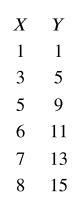

Berikut adalah proses menghitung model Regresi Linear dari data di atas:

**1. Menghitung rata-rata X dan Y**

<center>
    $n=6$
<center>
    $\bar{x} = \frac{1+3+5+6+7+8}{6} = \frac{30}{6} = 5$
<center>
    $\bar{y} = \frac{1+5+9+11+13+15}{6} = \frac{54}{6} = 9$

**2. Menghitung $b_1$**

$\begin{eqnarray}
\hat{b_1} &=& \frac{\sum \limits^{n}_{i=1} (x_i - \bar{x})(y_i - \bar{y})}{\sum \limits^{n}_{i=1} (x_i - \bar{x})^2}\\
\hat{b_1} &=& \frac{\left( [1 − 5][1 − 9] + [3 − 5][5 − 9] + [5 − 5][9 − 9] + [6 − 5][11 − 9] + [7 − 5][13 − 9] + [8 − 5]\right)}{\left([1-5]^2+[3-5]^2+[5-5]^2+[6-5]^2+[7-5]^2+[8-5]^2\right)}\\
\hat{b_1} &=& \frac{\left((−4)(−8) + (−2)(−4) + (0)(0) + (1)(2) + (2)(4) + (3)(6)\right)}{\left((-4)^2+(-2)^2+0^2+1^2+2^2+3^2\right)}\\
\hat{b_1} &=& \frac{32 + 8 + 0 + 2 + 8 + 18}{16 + 4 + 0 + 1 + 4 + 9}\\
\hat{b_1} &=& \frac{68}{34}\\
\hat{b_1} &=& 2\\
\end{eqnarray}$

**3. Menghtiung $b_0$**

<center>
    $\begin{eqnarray}
    \hat{b_0} = \bar{y}-\hat{b_1}\bar{x}\\
    \hat{b_0} = 9 - (2) \times 5\\
    \hat{b_0} = -1\\
    \end{eqnarray}$

**4. Menyusun Persamaan Regresi Linear**

<center>
    $\begin{eqnarray}
    Y = \hat{b_0} + \hat{b_1}X\\
    Y = -1 + 2X\\
    \end{eqnarray}$

# Regresi Linear Python From Scratch

**Membangun Model Regresi Linear**

Pertama, import library python yang dibutuhkan yaitu:

* Numpy
* Pandas
* Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Untuk memahami konsep, kita akan menggunakan data X dan Y seperti yang kita tunjukkan pada proses penghitungan manual.

In [2]:
X_train=np.array([1, 3, 5, 6, 7, 8])
y_train=np.array([1, 5, 9, 11, 13, 15])

In [3]:
# Proses Training Model
# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
print("Rata-rata X:", x_rata2)
y_rata2 = np.mean(y_train)
print("Rata-rata Y:", y_rata2)
# Jumlah data 
n = len(X_train)
print("Jumlah data(n):", y_rata2)
# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
 a = (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
 print("(",X_train[i], "-", x_rata2, ")", "*", "(", y_train[i], "-", y_rata2, ") =", a )
 A += a
 b = (X_train[i] - x_rata2) ** 2
 print("(", X_train[i], "-", x_rata2, ")", "^2", " =", b )
 B += b
 
print("Pembilang =", A)
print("Penyebut =", B)
# Menampilkan Koefisien Regresi Linear
b_1 = A / B
print("b_1 =", b_1)
b_0 = y_rata2 - (b_1 * x_rata2)
print("b_0 =", b_0)

Rata-rata X: 5.0
Rata-rata Y: 9.0
Jumlah data(n): 9.0
( 1 - 5.0 ) * ( 1 - 9.0 ) = 32.0
( 1 - 5.0 ) ^2  = 16.0
( 3 - 5.0 ) * ( 5 - 9.0 ) = 8.0
( 3 - 5.0 ) ^2  = 4.0
( 5 - 5.0 ) * ( 9 - 9.0 ) = 0.0
( 5 - 5.0 ) ^2  = 0.0
( 6 - 5.0 ) * ( 11 - 9.0 ) = 2.0
( 6 - 5.0 ) ^2  = 1.0
( 7 - 5.0 ) * ( 13 - 9.0 ) = 8.0
( 7 - 5.0 ) ^2  = 4.0
( 8 - 5.0 ) * ( 15 - 9.0 ) = 18.0
( 8 - 5.0 ) ^2  = 9.0
Pembilang = 68.0
Penyebut = 34.0
b_1 = 2.0
b_0 = -1.0


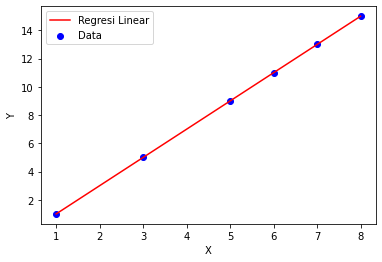

In [4]:
# Plot Nilai Data
x_max = np.max(X_train)
x_min = np.min(X_train)
# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x
# Plott Garis Regresi 
plt.plot(x, y, color='red', label='Regresi Linear')
# Plot Titik Data
plt.scatter(X_train, y_train, color='blue', label='Data')
# Label sumbu
plt.xlabel('X')
# Label sumbu y
plt.ylabel('Y')
# Menampilkan Legenda
plt.legend()
# Menampilkan Gambar Hasil Plot
plt.show()

**Implementasi Model Regresi Linear Pada Data Real**

Kita akan menggunakan dataset yang berisi **ukuran kepala** dan **berat organ otak**.

In [10]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ditamaylani/dataset_tesla/main/TSLA.csv')
# Melihat ukuran dataset
print(dataset.shape)
# Menampilkan 5 data teratas
dataset.head()

(72, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,54.222000,57.330002,50.158001,53.230000,53.230000,400305000
1,2015-08-01,53.257999,54.200001,39.000000,49.812000,49.812000,576320500
2,2015-09-01,48.068001,54.313999,47.394001,49.680000,49.680000,401440500
3,2015-10-01,49.501999,49.967999,40.400002,41.386002,41.386002,504060000
4,2015-11-01,41.784000,46.916000,41.160000,46.051998,46.051998,392442000


Mencari hubungan antara data X(Ukuran Kepala) dan Y(Berat Organ Otak)

In [14]:
# Definisikan Variabel Input(X) dan Output(Y)
X = dataset['Open'].values.reshape(-1,1)
Y = dataset['Close'].values.reshape(-1,1)

In [15]:
# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
# Proses Training Model

# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
y_rata2 = np.mean(y_train)

# Jumlah data
n = len(X_train)

# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
  A += (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
  B += (X_train[i] - x_rata2) ** 2

b_1 = A / B
b_0 = y_rata2 - (b_1 * x_rata2)

# Menampilkan Koefisien Regresi Linear
print(b_0, b_1)

[8.0933125] [0.99294788]


Dalam notasi matematika, hasil ini dapat ditulis sebagai berikut:

<center>
    Close = 8.0933125 + 0.99294788 * Open

Sekarang kita memiliki model linier. Mari kita plot secara grafis.

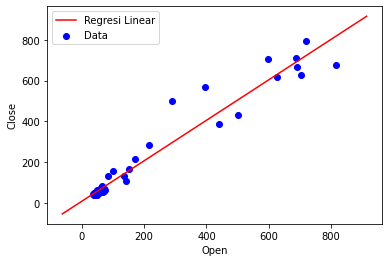

In [18]:
# Plot Nilai Data
x_max = np.max(X) + 100
x_min = np.min(X) - 100

# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X, Y, color='blue', label='Data')

# Label sumbu
plt.xlabel('Open')

# Label sumbu y
plt.ylabel('Close')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

# Evaluasi Model

Kita perlu mengukur tingkat ketepatan(akurasi) model yang telah diperoleh. Terdapat banyak metode untuk melakukan hal ini, namun pada artikel ini kita memilih menggunakan **Root Mean Square Error dan Koefisien Determinasi ($ 𝑅^2 $ Skor)**

<center>
    $ RMSE = \sqrt{\frac{1}{n} \sum \limits^{n}_{i=1} (y_i - \hat{y_i})^2} $

$ \hat y_{i} $ adalah nilai hasil prediksi ke-i. Berikut adalah penulisan kode untuk RMSE

In [19]:
rmse = 0
for i in range(len(X_test)):
  y_pred= b_0 + b_1* X_test[i]
  rmse += (y_test[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

[8.72114438]


Selanjutnya, mari kita hitung nilai **$ R^2 $** skor untuk mengukur tingkat akurasi dari model linear yang diperoleh, secara matematis **$ R^2 $** dituliskan sebagai berikut:

<center>
    $ 𝑅^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum \limits (\hat{y_i} - \bar{y})^2}{\sum \limits (y_i - \bar{y})^2} $

SSE adalah jumlah kuadrat galat sedangkan SST jumlah kuadrat total.

**$ R^2 $** skor biasanya memiliki nilai antara 0 hingga 1. Nilai ini juga bisa bernilai negatif jika model regresi benar - benar salah. Di bawah ini adalah kode pemrograman untuk menghitung **$ R^2 $** skor

In [20]:
SST = 0
SSE = 0
y_pred= b_0 + b_1*X_test
y_rata2 = np.mean(y_test)
for i in range(len(X_test)) :
  SST += (y_test[i] - y_rata2) ** 2
  SSE += (y_test[i] - y_pred[i]) **2
  
score = 1- (SSE/SST)
print("Koefisien Determinasi:", score)

Koefisien Determinasi: [0.98544178]
